In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('data.csv')
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [3]:
lb=LabelEncoder()

In [5]:
df.isnull().sum().sum()
df.columns

Index(['Age', 'Experience', 'Rank', 'Nationality', 'Go'], dtype='object')

In [6]:
df_n=df[['Age', 'Experience', 'Rank', 'Go']].apply(LabelEncoder().fit_transform)

In [8]:
x=df_n.drop('Go',axis=1)
y=df_n['Go']

In [9]:
x

,Age,Experience,Rank,Nationality
0,4,4,5,1
1,5,5,0,2
2,1,1,2,0
3,9,1,0,2
4,6,8,4,2
5,7,7,1,1
6,10,0,3,0
7,3,7,5,1
8,9,6,3,0
9,3,2,5,0


In [10]:
y

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64

In [22]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.25,random_state=0)

In [23]:
lm=DecisionTreeClassifier().fit(x_tr,y_tr)

In [24]:
lm.score(x_ts,y_ts)

1.0

In [32]:
tp=[[40,10,7,2]]

In [33]:
lm.predict(tp)

/home/patil/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

[Text(0.3333333333333333, 0.875, 'X[2] <= 2.5\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5, 0.625, 'X[1] <= 3.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.375, 'X[1] <= 5.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

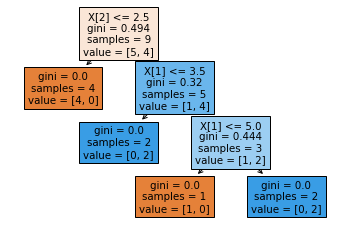

In [35]:
plot_tree(lm,filled=True)